# Different ploting tools

In [1]:
%%capture
%run ./001_dataset-regression.ipynb

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt

## Matplotlib & ipywidget

In [3]:
def plot_f(i: int,x_datasets: np.array,y_datasets_w_noise: np.array,true_f_x: np.array,true_f_y: np.array):
    """
    Plot the function and the data coming from it for specific dataset i in x_datasets.
    i: index to indicate which dataset to plot from x_datasets.
    x_datasets: input features of the d datatsets.
    y_datasets_w_noise: targets of the d datasets.
    true_f_x: x coordinates of the points from the true function.
    true_f_y: y cordinates of the points from the true function.
    """
    fig,ax = plt.subplots(figsize=(7,7))
    ax.set_ylim((-4,18))
    ax.set_xlim((0,10))
    ord = x_datasets[i,:].argsort()
    ax.plot(true_f_x,true_f_y,color='blue')
    ax.scatter(x_datasets[i,:],y_datasets_w_noise[i,:],color = 'orange')
    return ax

In [4]:
interact(lambda i : plot_f(i,X_trains,y_trains,true_f_x,true_f_y), i=widgets.IntSlider(min=0, max=d-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

## Plotly

In [5]:
def f_plotly(i: int,x_datasets: np.array,y_datasets_w_noise: np.array,true_f_x: np.array,true_f_y: np.array):
    """
    Plot the function and the data coming from it for specific dataset i in x_datasets (using plotly).
    i: index to indicate which dataset to plot from x_datasets.
    x_datasets: input features of the d datatsets.
    y_datasets_w_noise: targets of the d datasets.
    true_f_x: x coordinates of the points from the true function.
    true_f_y: y cordinates of the points from the true function.
    """
    fig = go.Figure(
        layout=go.Layout(
          title=go.layout.Title(text=f"Samples and True Function. Dataset {i}"),
          xaxis_range = (0,10),
          yaxis_range = (-4,20),
          height=600,
          width=600,
          ))
    fig.add_trace(go.Scatter(x=x_datasets[i,:],y=y_datasets_w_noise[i,:],mode='markers',name='samples'))
    fig.add_trace(go.Scatter(x=true_f_x,y=true_f_y,mode='lines',name='true function'))
    return fig

In [6]:
interact(lambda i : f_plotly(i,X_trains,y_trains,true_f_x,true_f_y), i=widgets.IntSlider(min=0, max=d-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

## Ploting P(X,Y) with Seaborn

In [7]:
s = 1000000
a = 0 # lower for the uniform
b = 10 #upper for the uniform
x = np.random.uniform(low=a,high=b,size=(1,s))
y_dn = np.apply_along_axis(func1d= f ,axis=1,arr=x)
y_dn += np.random.normal(loc=0,scale=np.sqrt(0.5),size=(1,s))
data = pd.DataFrame(x.T,columns=["x"])
data["y"] = y_dn.T

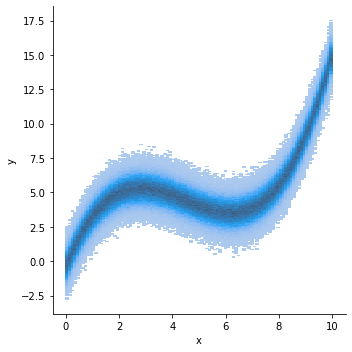

In [8]:
import seaborn as sns
f_dist = sns.displot(data,x="x", y="y")

### Ploting P(X,Y) with Plotly

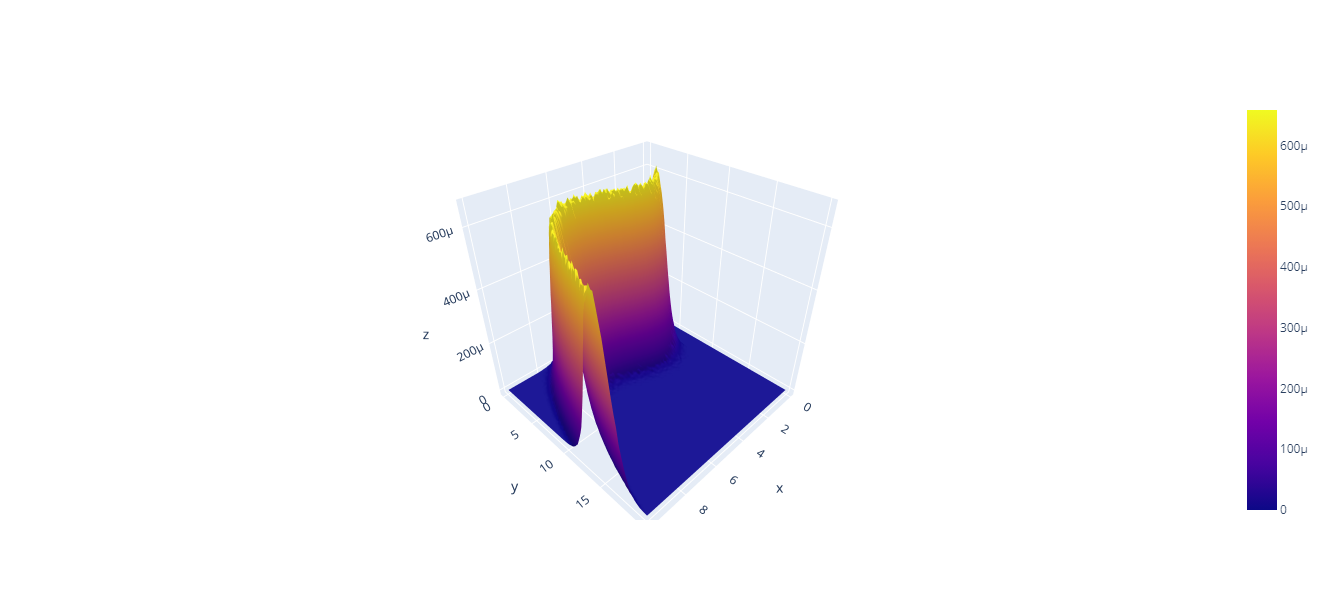

In [9]:
s = 10000000
x = np.random.uniform(10,size=(1,s))
y_dn = np.apply_along_axis(func1d= f ,axis=1,arr=x)
y_dn += np.random.normal(loc=0,scale=np.sqrt(2),size=(1,s))
xedges = np.linspace(0,10,100)
yedges = np.linspace(0,20,100)
H, xedges, yedges = np.histogram2d(x.ravel(), y_dn.ravel(), bins=(xedges, yedges))
H /= s # normalize
H = H.T  # Let each row list bins with common y range.

X, Y = np.meshgrid(xedges + ((xedges[1] - xedges[0]) / 2 )
                   ,yedges + ((yedges[1] - yedges[0]) / 2 ))
Z = np.random.randint(100,size=(200,200))

fig = go.Figure(data=[go.Surface(x=X,y=Y,z=H)],
                layout=go.Layout(xaxis_range = (0,10),yaxis_range = (-4,20),height=600,width=600,))
fig.show()

## Ploting P(X,Y) with Geogebra

[Plot de Pr(X,Y) en Geogebra.](https://www.geogebra.org/3d/uyqknepp)